# Errors and Data Filtering

All data fields contain corresponding errors, which should be used to correctly interpret the significance of the data. Additionally, there are some filters based on data quality metrics in the data files that are recommended for most scientific applications.

In [8]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os
import madrigalWeb.madrigalWeb

In [9]:
madrigalUrl='http://cedar.openmadrigal.org'

data = madrigalWeb.madrigalWeb.MadrigalData(madrigalUrl)

user_fullname = 'Student Example' 
user_email = 'isr.summer.school@gmail.com' 
user_affiliation= 'ISR Summer School 2024'
code = 61   # PFISR
year = 2024
month = 1
day = 8
hour1 = 7 
minute1 = 1
hour2 = 13
# list of experiments inside a time period of a day
expList = data.getExperiments(code,year,month,day,hour1,minute1,0,year,month,day,hour2,0,0)
for exp in expList:
    print(str(exp))

id: 100278619
realUrl: http://cedar.openmadrigal.org/showExperiment/?experiment_list=100278619
url: http://cedar.openmadrigal.org/madtoc/experiments4/2024/pfa/08jan24a
name: Themis36 - Auroral and convection measurements
siteid: 10
sitename: CEDAR
instcode: 61
instname: Poker Flat IS Radar
startyear: 2024
startmonth: 1
startday: 8
starthour: 7
startmin: 1
startsec: 4
endyear: 2024
endmonth: 1
endday: 8
endhour: 18
endmin: 0
endsec: 0
isLocal: True
madrigalUrl: http://cedar.openmadrigal.org/
PI: Asti Bhatt
PIEmail: asti.bhatt@sri.com
uttimestamp: 1709109883
access: 2
Madrigal version: 3.2



In [10]:
fileList = data.getExperimentFiles(expList[0].id)
for file0 in fileList:
    print(os.path.basename(file0.name),'\t', file0.kindat, '\t',file0.kindatdesc)

pfa20240108.001_ac_nenotr_01min.001.h5 	 1000201 	 Ne From Power - Alternating Code (E-region) - 1 min
pfa20240108.001_ac_fit_01min.001.h5 	 2000201 	 Fitted - Alternating Code (E-region) - 1 min
pfa20240108.001_ac_nenotr_03min.001.h5 	 1000203 	 Ne From Power - Alternating Code (E-region) - 3 min
pfa20240108.001_ac_fit_03min.001.h5 	 2000203 	 Fitted - Alternating Code (E-region) - 3 min
pfa20240108.001_ac_nenotr_05min.001.h5 	 1000205 	 Ne From Power - Alternating Code (E-region) - 5 min
pfa20240108.001_ac_fit_05min.001.h5 	 2000205 	 Fitted - Alternating Code (E-region) - 5 min
pfa20240108.001_ac_nenotr_10min.001.h5 	 1000210 	 Ne From Power - Alternating Code (E-region) - 10 min
pfa20240108.001_ac_fit_10min.001.h5 	 2000210 	 Fitted - Alternating Code (E-region) - 10 min
pfa20240108.001_ac_nenotr_15min.001.h5 	 1000215 	 Ne From Power - Alternating Code (E-region) - 15 min
pfa20240108.001_ac_fit_15min.001.h5 	 2000215 	 Fitted - Alternating Code (E-region) - 15 min
pfa20240108.001_

In [11]:
# Download the file that we need to run these examples
os.makedirs('data', exist_ok=True)
filepath= 'data/pfa20240108.001_lp_fit_01min.001.h5 '

if not os.path.exists(filepath):

    fileList = data.getExperimentFiles(expList[0].id)
    for file0 in fileList:
        if file0.kindatdesc == 'Fitted - Long Pulse (F-region) - 1 min':
            file2download = file0.name
            break
        
    print('Downloading data file...')

    file = data.downloadFile(file2download, filepath, 
                               user_fullname, user_email, user_affiliation,'hdf5')    
    print('...Done!')

else:
    print(f"File {filepath} already downloaded")
    

File data/pfa20240108.001_lp_fit_01min.001.h5  already downloaded


## Error Fields
Errors for all parameters can be found in the 2D Parameters array.

In [13]:
with h5py.File(filepath, 'r') as h5:
    bidx = 'Array with beamid=64157 '

    rng = np.array(h5['Data/Array Layout'][bidx]['range'])
    ne = np.array(h5['Data/Array Layout'][bidx]['2D Parameters']['ne'])
    utime = np.array(h5['Data/Array Layout'][bidx]['timestamps'])

    # Read in all error arrays
    dNe = np.array(h5['Data/Array Layout'][bidx]['2D Parameters']['dne'])
    dTi = np.array(h5['Data/Array Layout'][bidx]['2D Parameters']['dti'])
    dTe = np.array(h5['Data/Array Layout'][bidx]['2D Parameters']['dte'])
    dVlos = np.array(h5['Data/Array Layout'][bidx]['2D Parameters']['dvo'])

time = utime.astype('datetime64[s]')

Plot RTI of electron density in beam 0.

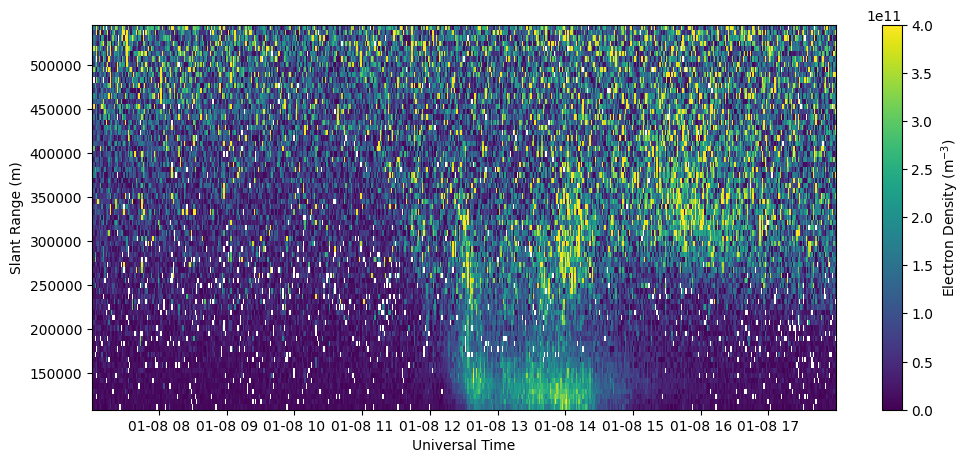

In [14]:
with h5py.File(filepath, 'r') as h5:
    
    bidx = np.array(h5['Data/Array Layout'])[0]

    rng = np.array(h5['Data/Array Layout'][bidx]['range'])
    ne = np.array(h5['Data/Array Layout'][bidx]['2D Parameters']['ne']).T
    utime = np.array(h5['Data/Array Layout'][bidx]['timestamps'])

    dNe = np.array(h5['Data/Array Layout'][bidx]['2D Parameters']['dne']).T


time = utime.astype('datetime64[s]')

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
c = ax.pcolormesh(time, rng[np.isfinite(rng)], ne[:,np.isfinite(rng)].T, vmin=0., vmax=4.e11)
ax.set_xlabel('Universal Time')
ax.set_ylabel('Slant Range (m)')
fig.colorbar(c, label=r'Electron Density (m$^{-3}$)')


Plot RTI of electron density error in beam 0.

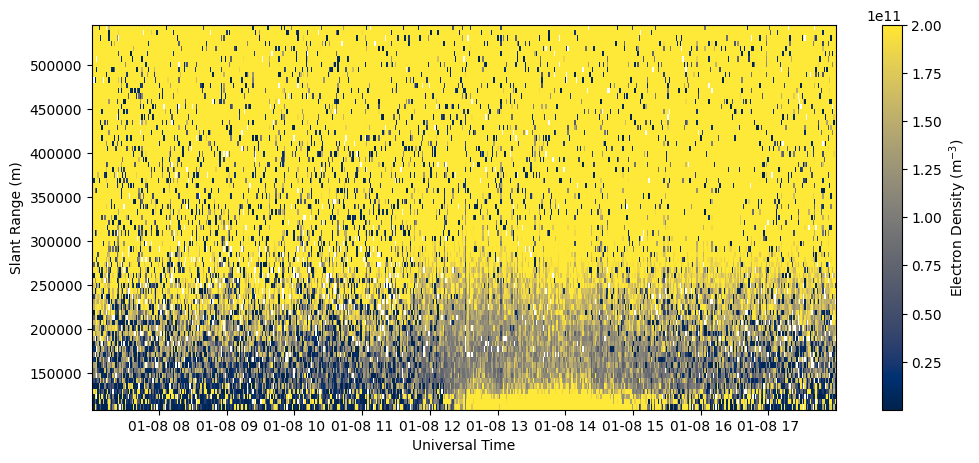

In [15]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
c = ax.pcolormesh(time, rng[np.isfinite(rng)], dNe[:,np.isfinite(rng)].T, vmax=2.e11, cmap='cividis')
ax.set_xlabel('Universal Time')
ax.set_ylabel('Slant Range (m)')
fig.colorbar(c, label=r'Electron Density (m$^{-3}$)')

## Data Quality Filtering
CEDAR data files contain a useful data quality parameter, chi<sup>2</sup>,  in the 2D Parameters array. Chi<sup>2</sup> measures the goodness-of-fit of the data. This is expected to be somewhere around 1 because of statistical variability. If chi<sup>2</sup> is substantially greater than 1, it indicates this was a very poor fit and the model is not a good match for the data, and therefor the output parameter should not be used. If chi<sup>2</sup> is substantially less than 1, it is also suspect because it suggests very little variance in the data, which is not characteristic of incoherent scatter. It is possible that this point is instead a coherent echo off a hard-target (such as a metallic satellite in the radar’s beam), which erroneously looks like a very high density value with a very low error. A reasonable value for chi<sup>2</sup> is between 0.1 - 10 for most situations.

In [16]:
with h5py.File(filepath, 'r') as h5:
    bidx = np.array(h5['Data/Array Layout'])[0]
    rng = np.array(h5['Data/Array Layout'][bidx]['range'])
    utime = np.array(h5['Data/Array Layout'][bidx]['timestamps'])
    ne = np.array(h5['Data/Array Layout'][bidx]['2D Parameters']['ne']).T
    chi2 = np.array(h5['Data/Array Layout'][bidx]['2D Parameters']['chisq']).T
    dNe = np.array(h5['Data/Array Layout'][bidx]['2D Parameters']['dne']).T


print(ne.shape, chi2.shape)

(543, 73) (543, 73)


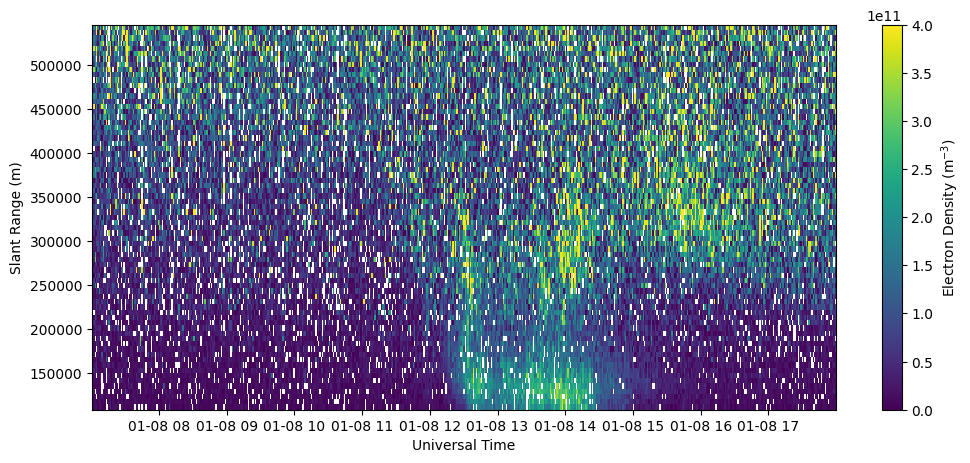

In [17]:
bad_data = np.logical_or(chi2<0.1, chi2>10.)
Ne_filt = ne.copy()
Ne_filt[bad_data] = np.nan

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
c = ax.pcolormesh(time, rng[np.isfinite(rng)], Ne_filt[:,np.isfinite(rng)].T, vmin=0., vmax=4.e11)

ax.set_xlabel('Universal Time')
ax.set_ylabel('Slant Range (m)')
fig.colorbar(c, label=r'Electron Density (m$^{-3}$)')

Plot electron density filtered by data quality parameters and where the density error is greater than the density (relative error greater than 1).

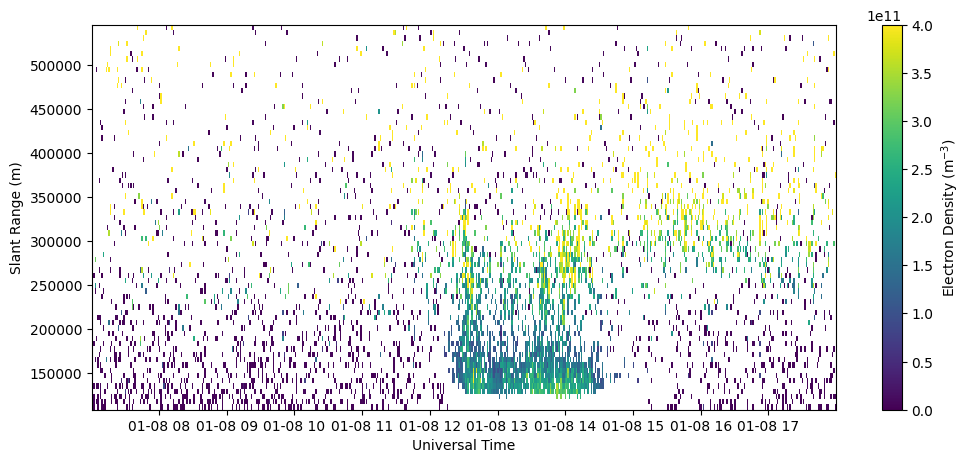

In [18]:
bad_data = np.logical_or(np.logical_or(chi2<0.1, chi2>10.), ne < dNe)
Ne_filt = ne.copy()
Ne_filt[bad_data] = np.nan

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
c = ax.pcolormesh(time, rng[np.isfinite(rng)], Ne_filt[:,np.isfinite(rng)].T, vmin=0., vmax=4.e11)

ax.set_xlabel('Universal Time')
ax.set_ylabel('Slant Range (m)')
fig.colorbar(c, label=r'Electron Density (m$^{-3}$)')